In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
df = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-10-23,116.550003,114.279999,116.389999,115.040001,82572600.0,115.040001
2020-10-26,116.550003,112.879997,114.010002,115.050003,111850700.0,115.050003
2020-10-27,117.279999,114.540001,115.489998,116.599998,92276800.0,116.599998


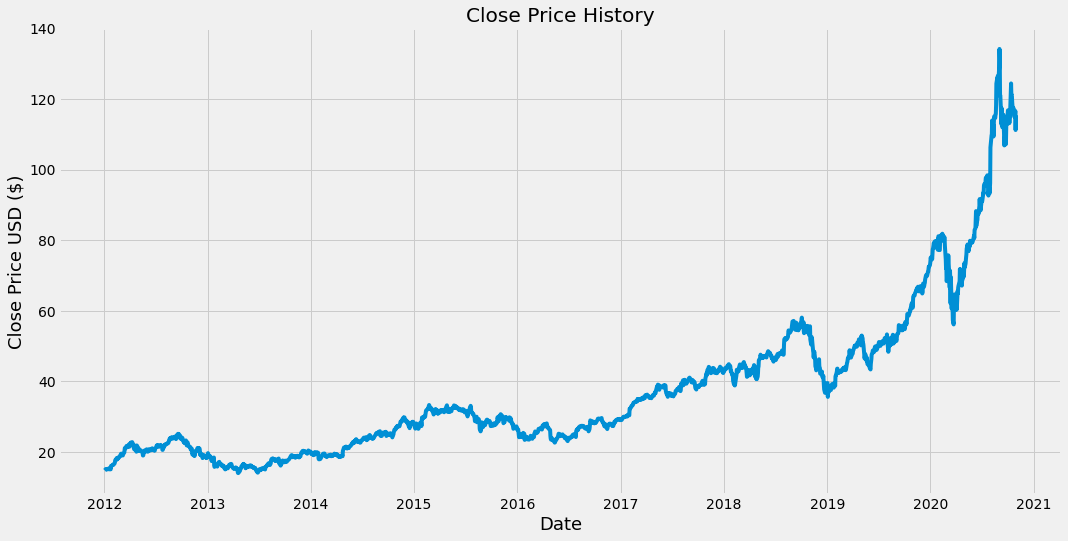

In [20]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [21]:
data = df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1)
data = data.values

In [22]:
sc = MinMaxScaler(feature_range=(0,1))
data_scaled = sc.fit_transform(data)

In [23]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(data_scaled,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1771
443
1771
443


In [24]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [25]:
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/300
56/56 [==============================] - 2s 32ms/step - loss: 0.0012 - val_loss: 0.0143
Epoch 2/300
56/56 [==============================] - 1s 25ms/step - loss: 0.0021 - val_loss: 0.0226
Epoch 3/300
56/56 [==============================] - 1s 25ms/step - loss: 0.0019 - val_loss: 0.0309
Epoch 4/300
56/56 [==============================] - 1s 24ms/step - loss: 0.0020 - val_loss: 0.0325
Epoch 5/300
56/56 [==============================] - 1s 26ms/step - loss: 0.0023 - val_loss: 0.0257
Epoch 6/300
56/56 [==============================] - 1s 26ms/step - loss: 0.0023 - val_loss: 0.0316
Epoch 7/300
56/56 [==============================] - 1s 24ms/step - loss: 0.0024 - val_loss: 0.0352
Epoch 8/300
56/56 [==============================] - 1s 25ms/step - loss: 0.0026 - val_loss: 0.0341
Epoch 9/300
56/56 [==============================] - 1s 25ms/step - loss: 0.0029 - val_loss: 0.0227
Epoch 10/300
56/56 [==============================] - 1s 24ms/step - loss: 0.0032 - val_loss: 0.0198

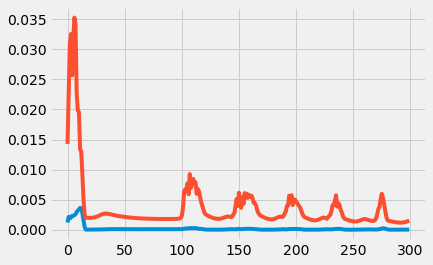

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

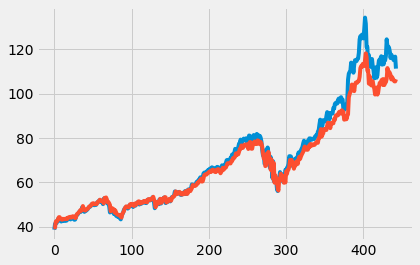

In [27]:
Xt = model.predict(X_test)
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(Xt))

In [30]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(sc.inverse_transform(Xt),sc.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(sc.inverse_transform(Xt))
act.append(sc.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[77.15345]], actual:[[79.57749939]]


In [31]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

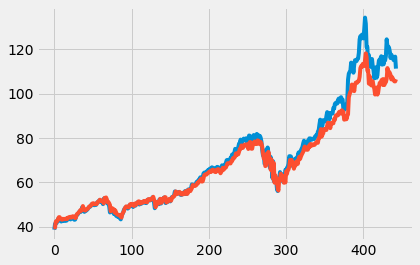

In [32]:
Xt = model.predict(X_test)
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(Xt))